In [26]:
#Exercise 1: Fit a linear regression model and plot the result
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = sns.load_dataset('flights')

In [27]:
df.head(1)

,year,month,passengers
0,1949,Jan,112


In [37]:
df.reset_index()

,index,year,month,passengers
0,0,1949,Jan,112
1,1,1949,Feb,118
2,2,1949,Mar,132
3,3,1949,Apr,129
4,4,1949,May,121
...,...,...,...,...
139,139,1960,Aug,606
140,140,1960,Sep,508
141,141,1960,Oct,461
142,142,1960,Nov,390


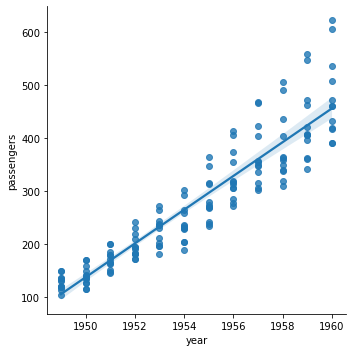

In [39]:
sns.lmplot(data=df, x='year', y='passengers') #, col='month', hue='month', col_wrap=4)

In [47]:
w1 = 1.5
w0 = 2.5

m = LinearRegression()
X= df[['year']]
y = df['passengers']

m.fit(X,y)


LinearRegression()

In [48]:
m.coef_, m.intercept_

(array([31.92395105]), -62115.06371406373)

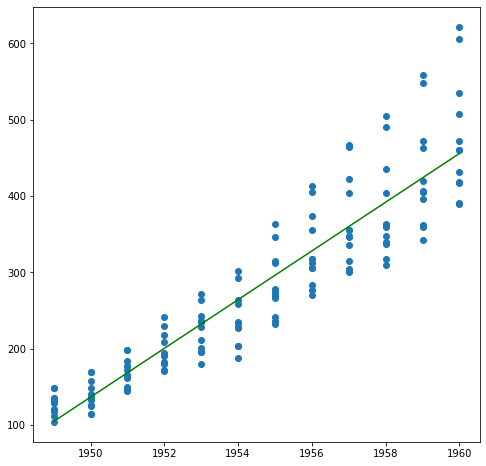

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y) # Real Data 
ax.plot(X, m.coef_[0]*X+m.intercept_, c='g') #Predictive Model 

In [40]:
#Polinomial Terms

from sklearn.preprocessing import PolynomialFeatures

X = pd.DataFrame({'a': [1.0, 2.0, 3.0, 4.0]})
m = PolynomialFeatures(degree=3)
m.fit_transform(X)



array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [41]:
#Interactions

X = pd.DataFrame({
      'a':[1.0, 2.0, 3.0],
      'b':[1.0, 2.0, 0.0]})
m = PolynomialFeatures(interaction_only=True)
m.fit_transform(X)


array([[1., 1., 1., 1.],
       [1., 2., 2., 4.],
       [1., 3., 0., 0.]])

In [42]:
#Radial Base Function (use of a continuous distribution to encode ordinal features)

def rbf(x, width, mean):
    """calculates a single RBF peak"""
    return np.exp(-(x - mean)**2 / (2 * width))

def rbf_transform(df, freq, width):
    """creates repeating seasonal RBF peaks"""
    n_values = df.shape[0]
    x = np.arange(n_values)
    for i in range(0, freq):
        df[f'rbf_{i}'] = 0
        for j in range(-freq, n_values+freq, freq):
            df[f'rbf_{i}'] += rbf(x, width, j + i)


In [ ]:
#Transform the target column 
#Apply transformation
ylog = np.log1p(y)
#Bring back log predictions to the original scale
ypred = np.exp(ypredlog)-1
#Then calculate the RMSLE score 

from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y, ypred))

In [44]:
#Generalized Linear Models : Poisson Regression (count data)

from sklearn.linear_model import PoissonRegressor
m = PoissonRegressor(alpha=1)
m.fit(X, y)
m.predict(X)


NameError: name 'y' is not defined